# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("./Data/trainData.csv")
test = pd.read_csv("./Data/testData.csv")

In [3]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We see that a few columns have null values. For some, we will just have to replace them with the mode, such as 'Gender' and 'Married', because it would not make sense to replace categorical variables with something such as the median or mean. For others, we will either not use them as predictors, or replace them with the mean, such as 'LoanAmount' or 'Loan_Amount_Term'.

In [3]:
train['Gender'] = train['Gender'].fillna('Male')
train['Married'] = train['Married'].fillna('Yes')
train['Dependents'] = train['Dependents'].fillna(0)
train['Self_Employed'] = train['Self_Employed'].fillna('No')
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(1.0)

In [4]:
test['Gender'] = test['Gender'].fillna('Male')
test['Married'] = test['Married'].fillna('Yes')
test['Dependents'] = test['Dependents'].fillna(0)
test['Self_Employed'] = test['Self_Employed'].fillna('No')
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(1.0)

We will look at the different categorical (potential) predictors and see if any of them may be a significant predictor of whether someone's loan gets accepted or not. 

Let's first look if there is any significant difference between the proportion of loans that are accepted between men and women. 

In [8]:
# Table of loan status vs. sex

group_by_sex = train.groupby(['Loan_Status', 'Gender'])
group_by_sex = group_by_sex.size().unstack()
group_by_sex = group_by_sex.apply(lambda x: x / float(x.sum()))
group_by_sex

Gender,Female,Male
Loan_Status,,
N,0.330357,0.308765
Y,0.669643,0.691235


From this we see that about a similar proportion of men and women get their loans accepted. Perhaps gender will not be a very significant predictor in whether a loan application gets accepted. 

Let's now look if there is any relation between loan status and marital status. 

In [13]:
# Table of loan status vs. marital status

group_by_mar = train.groupby(['Loan_Status', 'Married'])
group_by_mar = group_by_mar.size().unstack()
group_by_mar = group_by_mar.apply(lambda x: x / float(x.sum()))
group_by_mar

Married,No,Yes
Loan_Status,,
N,0.370892,0.281796
Y,0.629108,0.718204


From this we see that a slightly higher percentage of people that are married will get their loans approved. 

Now looking at education...

In [14]:
# Table of loan status vs. education

group_by_ed = train.groupby(['Loan_Status', 'Education'])
group_by_ed = group_by_ed.size().unstack()
group_by_ed = group_by_ed.apply(lambda x: x / float(x.sum()))
group_by_ed

Education,Graduate,Not Graduate
Loan_Status,,
N,0.291667,0.38806
Y,0.708333,0.61194


From this, we do see that a person is 9% more likely to have their loan approved if they did graduate. 

Self-employed...

In [17]:
# Table of loan status vs. self_employment

group_by_self = train.groupby(['Loan_Status', 'Self_Employed'])
group_by_self = group_by_self.size().unstack()
group_by_self = group_by_self.apply(lambda x: x / float(x.sum()))
group_by_self

Self_Employed,No,Yes
Loan_Status,,
N,0.31203,0.317073
Y,0.68797,0.682927


There is virtually no difference in the proportion of loan approvals between people who are and are not self-employed.

Property area...

In [18]:
# Table of loan status vs. propery_area

group_by_loc = train.groupby(['Loan_Status', 'Property_Area'])
group_by_loc = group_by_loc.size().unstack()
group_by_loc = group_by_loc.apply(lambda x: x / float(x.sum()))
group_by_loc

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,0.385475,0.23176,0.341584
Y,0.614525,0.76824,0.658416


People who live in semiurban areas are more likely to get their loans approved than people who live in rural or urban areas. Urban and rural residents have somewhat similar rates of acceptance. 

Credit history...

In [79]:
# Table of loan status vs. credit history

group_by_cred = train.groupby(['Loan_Status', 'Credit_History'])
group_by_cred = group_by_cred.size().unstack()
group_by_cred = group_by_cred.apply(lambda x: x / float(x.sum()))
group_by_cred

Credit_History,0.0,1.0
Loan_Status,,
N,0.921348,0.209524
Y,0.078652,0.790476


This is great, as we can see here, it is almost certain that a loan will not get approved if the applicant has no credit history and there is about an 80% chance the loan will get approved if the applicant does have a credit history. 

Loan amount term...

In [126]:
# Table of loan status vs. loan amount term

group_by_term = train.groupby(['Loan_Status', 'Loan_Amount_Term'])
group_by_term = group_by_term.size().unstack()
group_by_term = group_by_term.apply(lambda x: x / float(x.sum()))
group_by_term

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,342.0,360.0,480.0
Loan_Status,,,,,,,,,,,
N,NaN,1.0,NaN,0.25,NaN,0.340909,0.25,0.384615,0.428571,0.298828,0.6
Y,1.0,NaN,1.0,0.75,1.0,0.659091,0.75,0.615385,0.571429,0.701172,0.4


Naive prediction based on quick analysis of categorical variables. 

In [10]:
test['Loan_Status'] = 'N'

In [19]:
test.loc[test.Married == 'Yes', 'Loan_Status'] = 'Y'
test.loc[test.Education == 'Graduate', 'Loan_Status'] = 'Y'
test.loc[test.Property_Area == 'Semiurban', 'Loan_Status'] = 'Y'

In [16]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,Y
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,N
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,Y
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,Y
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,N


In [44]:
output = pd.DataFrame({'Loan_ID' :test['Loan_ID'], 'Loan_Status': test['Loan_Status']})

output.to_csv("./Data/NaiveSubmission.csv", header = True, index = False)

## Looking more at continuous variables

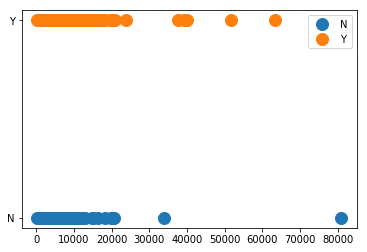

In [38]:
groups = train.groupby('Loan_Status')

# Plot of loan status vs income

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.ApplicantIncome, group.Loan_Status, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

As we can see, after an income of about $21,000, the loan is very likely to get approved. This makes a lot of sense as someone with a high income is *probably* more likely to be able to pay off a loan.

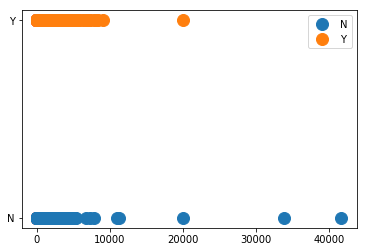

In [41]:
# loan status vs coapplicant income

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.CoapplicantIncome, group.Loan_Status, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

This graph doesn't tell us much.

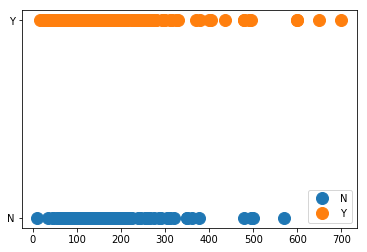

In [42]:
# Plot

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.LoanAmount, group.Loan_Status, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

If the loan amount is more than $600, then it is going to get approved according to this training data.

It's time to predict again based on these naive and superficial findings.

In [43]:
test.loc[test.ApplicantIncome > 21000, 'Loan_Status'] = 'Y'
test.loc[test.LoanAmount > 600, 'Loan_Status'] = 'Y'

# Logistic Regression

In [5]:
train['Married'] = np.where(train['Married'] == 'Yes', 1, 0)
train['Education'] = np.where(train['Education'] == 'Graduate', 1, 0)
test['Married'] = np.where(test['Married'] == 'Yes', 1, 0)
test['Education'] = np.where(test['Education'] == 'Graduate', 1, 0)

In [6]:
train_with_dummies = pd.get_dummies(train, prefix = 'Area_', columns = ['Property_Area'])
test_with_dummies = pd.get_dummies(test, prefix='Area_', columns = ['Property_Area'])

In [7]:
train = train_with_dummies
test = test_with_dummies

In [141]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Area__Rural,Area__Semiurban,Area__Urban
0,LP001002,Male,0,0,1,No,5849,0.0,146.412162,360.0,1.0,Y,0,0,1
1,LP001003,Male,1,1,1,No,4583,1508.0,128.000000,360.0,1.0,N,1,0,0
2,LP001005,Male,1,0,1,Yes,3000,0.0,66.000000,360.0,1.0,Y,0,0,1
3,LP001006,Male,1,0,0,No,2583,2358.0,120.000000,360.0,1.0,Y,0,0,1
4,LP001008,Male,0,0,1,No,6000,0.0,141.000000,360.0,1.0,Y,0,0,1


In [127]:
x = train[['Married', 'Education', 'Area__Rural','Area__Semiurban', 'Area__Urban', 'ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount']]
y = train['Loan_Status']

In [128]:
test_x = test[['Married', 'Education', 'Area__Rural','Area__Semiurban', 'Area__Urban', 'ApplicantIncome', 'Credit_History', 'Loan_Amount_Term','LoanAmount']]

In [129]:
print(x.shape, y.shape, test_x.shape)

(614, 9) (614,) (367, 9)


In [130]:
x.head()

,Married,Education,Area__Rural,Area__Semiurban,Area__Urban,ApplicantIncome,Credit_History,Loan_Amount_Term,LoanAmount
0,0,1,0,0,1,5849,1.0,360.0,146.412162
1,1,1,1,0,0,4583,1.0,360.0,128.000000
2,1,1,0,0,1,3000,1.0,360.0,66.000000
3,1,0,0,0,1,2583,1.0,360.0,120.000000
4,0,1,0,0,1,6000,1.0,360.0,141.000000


In [131]:
np.random.seed(100)
train_x, valid_x, train_y, valid_y = train_test_split(
    x, y, test_size=1/10.0, random_state=0)

valid_y = list(valid_y)

In [132]:
logisticRegr = LogisticRegression(warm_start = True)

In [133]:
logisticRegr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=True)

In [148]:
#predict on validation
val_pred = logisticRegr.predict(valid_x)

corr  = 0

for i, pred  in enumerate (val_pred):
    if pred == valid_y[i]:
        corr += 1

acc = corr/len(valid_y)
print("Accuracy: " + str(acc))

Accuracy: 0.8709677419354839


In [149]:
predictions = logisticRegr.predict(test_x)

In [150]:
output = pd.DataFrame({'Loan_ID':test['Loan_ID'], 'Loan_Status': predictions})

output.to_csv("./Data/LogReg.csv", header = True, index = False)

# Decision Tree

In [145]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [146]:
#predict on validation
val_pred = clf.predict(valid_x)

corr  = 0

for i, pred  in enumerate (val_pred):
    if pred == valid_y[i]:
        corr += 1

acc = corr/len(valid_y)
print("Accuracy: " + str(acc))

Accuracy: 0.8548387096774194


In [147]:
predictions = clf.predict(test_x)

output = pd.DataFrame({'Loan_ID':test['Loan_ID'], 'Loan_Status': predictions})

output.to_csv("./Data/DecTree.csv", header = True, index = False)